### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Матюшкин Денис Владимирович
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 4

Automobile Data Set  

Название файла: imports-85.data

Ссылка: https://archive.ics.uci.edu/ml/datasets/Automobile  

Первый признак: horsepower (столбец No 22)  

Второй признак: price (столбец No 26)  

Третий признак: compression-ratio (столбец No 21)

Класс: symboling (столбец No 1)

Метод обработки пропущенных значений – среднее значение класса

Метод нормализации признаков – нормировка по норме L1

Алгоритм снижения размерности данных – отбор на основе важности признаков (ExtraTreesClassifier)

Метод валидации модели – стратифицированная кросс-валидация по 10 блокам

Показатель качества модели – полнота (recall)

1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.

In [523]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [524]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
                "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
                "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
                "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
                "city-mpg", "highway-mpg", "price"]

my_data = pd.read_csv(url, names=column_names)
my_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [525]:
selected_columns = ['symboling', 'compression-ratio', 'horsepower', 'price']
df = my_data[selected_columns]

df.head()

,symboling,compression-ratio,horsepower,price
0,3,9.0,111,13495
1,3,9.0,111,16500
2,1,9.0,154,16500
3,2,10.0,102,13950
4,2,8.0,115,17450


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами при помощи стандартизованной оценки (Z-score). Выберите параметры стандартизованной оценки таким образом, чтобы выбросы составляли от 1% до 10% всех точек набора данных. Если количество различных меток классов превышает 4, то уменьшите количество классов.


In [526]:
df = df.replace('?', np.NaN)
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['price'] = pd.to_numeric(df['price'])
df['compression-ratio'] = pd.to_numeric(df['compression-ratio'])

df.isnull().sum()

,0
symboling,0
compression-ratio,0
horsepower,2
price,4


Среди класса меток отсутсвуют пропущенные значения.

In [527]:
# df.dropna(subset=['symboling'], inplace=True)

In [528]:
df['horsepower'] = df.groupby('symboling')['horsepower'].transform(lambda x: x.fillna(x.mean()))
df['price'] = df.groupby('symboling')['price'].transform(lambda x: x.fillna(x.mean()))

df.isnull().sum()

,0
symboling,0
compression-ratio,0
horsepower,0
price,0


Пропущеннные значения в наборе данных присуствуют, но не в классе меток, мы не сократили записи, поэтому для примера удалим точки с выбросами при помощи стандартизованной оценки (Z-score).

In [529]:
initial_count = df.shape[0]

z_scores = np.abs(stats.zscore(df[['horsepower', 'compression-ratio', 'price']]))
df = df[(z_scores < 3).all(axis=1)]

final_count = df.shape[0]
removed_outliers = initial_count - final_count
percentage_removed = (removed_outliers / initial_count) * 100

print(f"Количество удалённых выбросов: {removed_outliers}")
print(f"Процент удалённых выбросов: {percentage_removed:.2f}%")

Количество удалённых выбросов: 16
Процент удалённых выбросов: 7.80%


In [530]:
class_counts = df["symboling"].value_counts()
class_counts

,count
symboling,
0,59
1,52
2,29
3,26
-1,20
-2,3


Количество различных меток больше 4, соединим наименьшие из них.

In [531]:
df["symboling"] = df["symboling"].apply(lambda x: x if x in class_counts.index[:3] else 3)
df["symboling"].value_counts(sort=True)

,count
symboling,
0,59
1,52
3,49
2,29


In [532]:
df

,symboling,compression-ratio,horsepower,price
0,3,9.0,111.0,13495.0
1,3,9.0,111.0,16500.0
2,1,9.0,154.0,16500.0
3,2,10.0,102.0,13950.0
4,2,8.0,115.0,17450.0
...,...,...,...,...
199,3,7.5,162.0,18950.0
200,3,9.5,114.0,16845.0
201,3,8.7,160.0,19045.0
202,3,8.8,134.0,21485.0


3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.

In [533]:
features = ['horsepower', 'compression-ratio', 'price']
df.loc[:, features] = normalize(df[features], norm='l1')

df.head()

,symboling,compression-ratio,horsepower,price
0,3,0.000661,0.008153,0.991186
1,3,0.000542,0.006679,0.992780
2,1,0.000540,0.009242,0.990218
3,2,0.000711,0.007254,0.992035
4,2,0.000455,0.006544,0.993001


4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

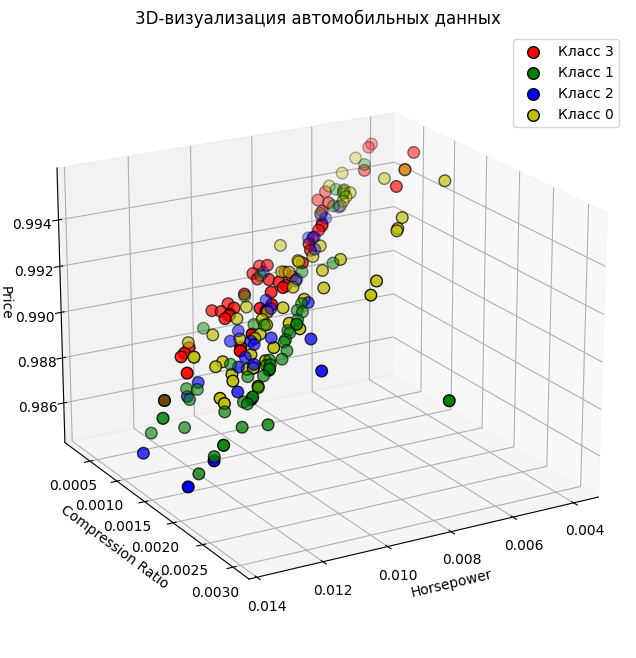

In [534]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
classes = df['symboling'].unique()

for i, class_value in enumerate(classes):
    subset = df[df['symboling'] == class_value]
    ax.scatter(
        subset['horsepower'], subset['compression-ratio'], subset['price'],
        c=colors[i], label=f'Класс {class_value}', s=70, edgecolors='k')

ax.set_xlabel('Horsepower')
ax.set_ylabel('Compression Ratio')
ax.set_zlabel('Price')
ax.view_init(elev=20, azim=60)

ax.set_title('3D-визуализация автомобильных данных')
ax.legend()
plt.show()

5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

In [535]:
from sklearn.ensemble import ExtraTreesClassifier

In [536]:
X = df[['horsepower', 'compression-ratio', 'price']]
y = df['symboling']

model = ExtraTreesClassifier()
model.fit(X, y)

importances = model.feature_importances_
importances

array([0.32124514, 0.36504925, 0.31370562])

In [537]:
indices = np.argsort(importances)[::-1][:2]
selected_features = X.columns[indices]

X = X[selected_features]
X.head()

,compression-ratio,horsepower
0,0.000661,0.008153
1,0.000542,0.006679
2,0.000540,0.009242
3,0.000711,0.007254
4,0.000455,0.006544


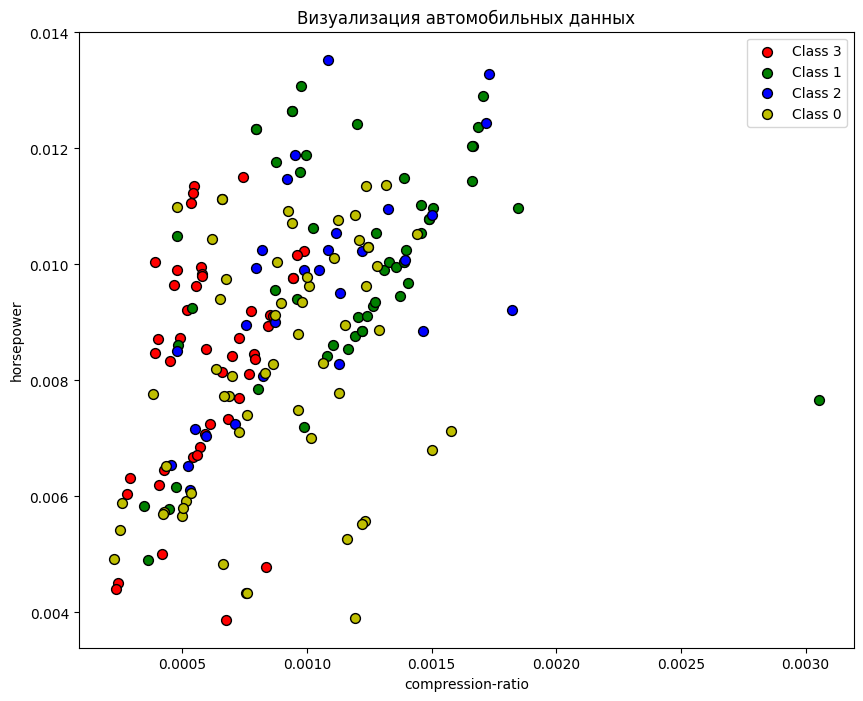

In [538]:
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['r', 'g', 'b', 'y']
classes = df['symboling'].unique()

for i, class_value in enumerate(classes):
    subset = X[df['symboling'] == class_value]
    ax.scatter(
        subset.iloc[:, 0], subset.iloc[:, 1],
        c=colors[i], label=f'Class {class_value}', s=50, edgecolors='k')

ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])

ax.set_title('Визуализация автомобильных данных')
ax.legend()
plt.show()

6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К<10 и определите оптимальное значение параметра К с минимальной долей ошибок.

In [539]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

min_error  = 0.0
optimal_k  = -1
for k in range(1, 10):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > min_error :
        optimal_k  = k
        min_error  = score

print(f'Оптимальное значение k: {optimal_k }')
print(f'Минимальная доля ошибок: {min_error }')

Оптимальное значение k: 5
Минимальная доля ошибок: 0.5416666666666666


7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.

In [541]:
from sklearn.metrics import classification_report, confusion_matrix

optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn.fit(X_train, y_train)

y_pred_optimal = optimal_knn.predict(X_test)

report = classification_report(y_test, y_pred_optimal)
print("Отчет о классификации:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print("Матрица ошибок:\n", conf_matrix)

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        16
           1       0.54      0.70      0.61        10
           2       0.00      0.00      0.00         8
           3       0.53      0.64      0.58        14

    accuracy                           0.54        48
   macro avg       0.42      0.49      0.45        48
weighted avg       0.47      0.54      0.50        48

Матрица ошибок:
 [[10  3  0  3]
 [ 2  7  0  1]
 [ 1  3  0  4]
 [ 3  0  2  9]]


8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:
* наивного байесовского классификатора  
* классификатора метода К ближайших соседей для значения К, определенного в п. 6.

In [542]:
from sklearn.naive_bayes import GaussianNB

In [543]:
X = df[['horsepower', 'compression-ratio', 'price']]
y = df['symboling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((141, 3), (48, 3), (141,), (48,))

Наивный байесовский классификатор:

In [544]:
nbc = GaussianNB()
nbc.fit(X_train,y_train);

y_pred_nbc = nbc.predict(X_test)

print("Отчет о классификации:\n", classification_report(y_test, y_pred_nbc, zero_division=0))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_nbc))

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.47      0.44      0.45        16
           1       0.35      0.60      0.44        10
           2       0.00      0.00      0.00         8
           3       0.44      0.50      0.47        14

    accuracy                           0.42        48
   macro avg       0.31      0.38      0.34        48
weighted avg       0.36      0.42      0.38        48

Матрица ошибок:
 [[7 4 0 5]
 [3 6 0 1]
 [1 4 0 3]
 [4 3 0 7]]


Классификатор K ближайших соседей с оптимальным значением K:

In [545]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Отчет о классификации:\n", classification_report(y_test, y_pred_knn))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_knn))

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.50      0.70      0.58        10
           2       0.00      0.00      0.00         8
           3       0.53      0.57      0.55        14

    accuracy                           0.50        48
   macro avg       0.41      0.46      0.43        48
weighted avg       0.46      0.50      0.48        48

Матрица ошибок:
 [[9 3 1 3]
 [2 7 1 0]
 [0 4 0 4]
 [4 0 2 8]]


9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.

In [546]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score

Оценка качества наивного байесовского классификатора:

In [547]:
skfold = StratifiedKFold(n_splits=10)

results_skfold = cross_val_score(nbc, X, y, cv=skfold, scoring=make_scorer(recall_score, average='macro'))
print("Среднее значение (дисперсия): %.2f (%.2f)" % (results_skfold.mean(), results_skfold.std()))

Среднее значение (дисперсия): 0.41 (0.13)


Оценка качества классификатора метода K ближайших соседей:

In [548]:
results_skfold = cross_val_score(knn, X, y, cv=skfold, scoring=make_scorer(recall_score, average='macro'))
print("Среднее значение (дисперсия): %.2f (%.2f)" % (results_skfold.mean(), results_skfold.std()))

Среднее значение (дисперсия): 0.44 (0.09)


10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

У классификатора метода K ближайших соседей более высокое среднее значение.

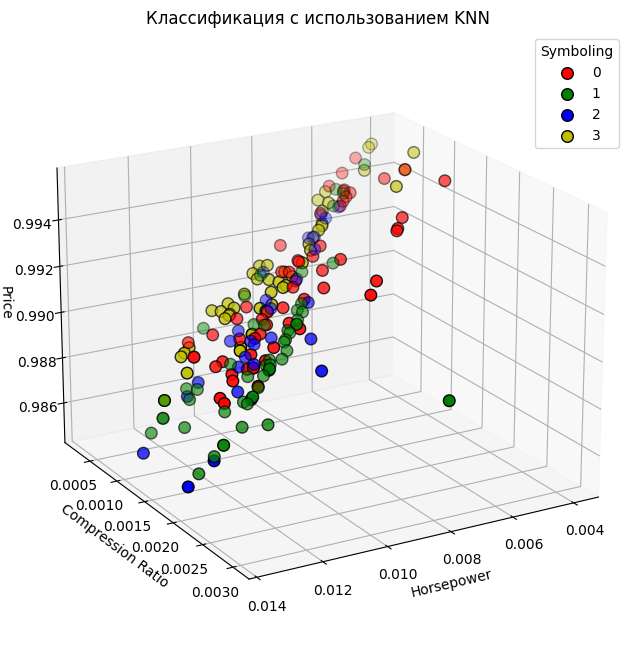

In [549]:
y_pred = knn.predict(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_classes = np.unique(y)
colors = ['r', 'g', 'b', 'y']

for idx, class_value in enumerate(unique_classes):
    ax.scatter(X[y == class_value]['horsepower'],
               X[y == class_value]['compression-ratio'],
               X[y == class_value]['price'],
               color=colors[idx], label=class_value, s=70, edgecolors='k')

ax.set_xlabel('Horsepower')
ax.set_ylabel('Compression Ratio')
ax.set_zlabel('Price')
ax.set_title('Классификация с использованием KNN')
ax.view_init(elev=20, azim=60)

ax.legend(title='Symboling')
plt.show()